Import the packages needed to perform the analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
os.getcwd()

'/home/thais/Documents/code/learning'

In [4]:
# Import the data
movies = pd.read_csv("boxstripplots-data.csv", encoding = "latin1")
len(movies)

608

In [5]:
# Explore the dataset
movies.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [6]:
movies.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [7]:
movies.columns = ["WeekDay", "Director", "Genre", "Title", "Date", "Studio", "AdjGrossM", "BudgetM", "GrossM", "IMDbR", "MoviesLensR", "OverseasM", "Overseas%", "ProfitM", "Profit%", "mRuntime", "USM", "Gross%US"]
movies.head()

,WeekDay,Director,Genre,Title,Date,Studio,AdjGrossM,BudgetM,GrossM,IMDbR,MoviesLensR,OverseasM,Overseas%,ProfitM,Profit%,mRuntime,USM,Gross%US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [8]:
# Check the summary of the dataframe
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WeekDay      608 non-null    object 
 1   Director     608 non-null    object 
 2   Genre        608 non-null    object 
 3   Title        608 non-null    object 
 4   Date         608 non-null    object 
 5   Studio       608 non-null    object 
 6   AdjGrossM    608 non-null    object 
 7   BudgetM      608 non-null    float64
 8   GrossM       608 non-null    object 
 9   IMDbR        608 non-null    float64
 10  MoviesLensR  608 non-null    float64
 11  OverseasM    608 non-null    object 
 12  Overseas%    608 non-null    float64
 13  ProfitM      608 non-null    object 
 14  Profit%      608 non-null    float64
 15  mRuntime     608 non-null    int64  
 16  USM          608 non-null    float64
 17  Gross%US     608 non-null    float64
dtypes: float64(7), int64(1), object(10)
memory usage: 

In [9]:
# Check the structure of the dataframe
movies.describe()

,BudgetM,IMDbR,MoviesLensR,Overseas%,Profit%,mRuntime,USM,Gross%US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [10]:
# Filter the dataframe by genre
moviesg = movies[(movies.Genre == 'action') | (movies.Genre == 'adventure') | (movies.Genre == 'animation') | (movies.Genre == 'comedy') | (movies.Genre == 'drama')]

len(moviesg)
moviesg.head()


,WeekDay,Director,Genre,Title,Date,Studio,AdjGrossM,BudgetM,GrossM,IMDbR,MoviesLensR,OverseasM,Overseas%,ProfitM,Profit%,mRuntime,USM,Gross%US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [11]:
# Filter the dataframe by studio
moviesgs = moviesg[(moviesg.Studio == 'Buena Vista Studios') | (moviesg.Studio == 'Fox') | (moviesg.Studio == 'Paramount Pictures') | (moviesg.Studio == 'Sony') | (moviesg.Studio == 'Universal') | (moviesg.Studio == 'WB')]

len(moviesgs)
moviesgs.head(10)


,WeekDay,Director,Genre,Title,Date,Studio,AdjGrossM,BudgetM,GrossM,IMDbR,MoviesLensR,OverseasM,Overseas%,ProfitM,Profit%,mRuntime,USM,Gross%US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
6,Thursday,Rob Marshall,adventure,Into the Woods,25/12/2014,Buena Vista Studios,213.9,50.0,212.9,6.0,3.16,84.9,39.9,162.9,325.8,125,128.0,60.1
7,Friday,Daniel Espinosa,action,Safe House,10/02/2012,Universal,215.5,85.0,208.1,6.8,3.45,81.7,39.3,123.1,144.8,115,126.4,60.7
8,Friday,Gary Shore,action,Dracula Untold,10/10/2014,Universal,216.5,70.0,215.5,6.3,2.92,159.2,73.9,145.5,207.9,92,56.3,26.1
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
14,Friday,Ryan Murphy,drama,Eat Pray Love,13/08/2010,Sony,223.1,60.0,204.6,5.6,2.84,124,60.6,144.6,241.0,133,80.6,39.4


In [12]:
# Check how the filters worked
print(moviesgs.Genre.unique())
print(moviesgs.Studio.unique())

['action' 'comedy' 'adventure' 'animation' 'drama']
['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']


In [13]:
# Explore the categorical variable Studio, used in the assignment
moviesgs.Studio = moviesgs.Studio.astype("category")
moviesgs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 0 to 606
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   WeekDay      423 non-null    object  
 1   Director     423 non-null    object  
 2   Genre        423 non-null    object  
 3   Title        423 non-null    object  
 4   Date         423 non-null    object  
 5   Studio       423 non-null    category
 6   AdjGrossM    423 non-null    object  
 7   BudgetM      423 non-null    float64 
 8   GrossM       423 non-null    object  
 9   IMDbR        423 non-null    float64 
 10  MoviesLensR  423 non-null    float64 
 11  OverseasM    423 non-null    object  
 12  Overseas%    423 non-null    float64 
 13  ProfitM      423 non-null    object  
 14  Profit%      423 non-null    float64 
 15  mRuntime     423 non-null    int64   
 16  USM          423 non-null    float64 
 17  Gross%US     423 non-null    float64 
dtypes: category(1), float64(7), int64(1

In [14]:
# acessing unique categories
moviesgs.Studio.cat.categories

Index(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal',
       'WB'],
      dtype='object')

In [15]:
# Explore the categorical variable Studio, used in the assignment
moviesgs.Genre = moviesgs.Genre.astype("category")
moviesgs.info()
moviesgs.Genre.cat.categories

<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 0 to 606
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   WeekDay      423 non-null    object  
 1   Director     423 non-null    object  
 2   Genre        423 non-null    category
 3   Title        423 non-null    object  
 4   Date         423 non-null    object  
 5   Studio       423 non-null    category
 6   AdjGrossM    423 non-null    object  
 7   BudgetM      423 non-null    float64 
 8   GrossM       423 non-null    object  
 9   IMDbR        423 non-null    float64 
 10  MoviesLensR  423 non-null    float64 
 11  OverseasM    423 non-null    object  
 12  Overseas%    423 non-null    float64 
 13  ProfitM      423 non-null    object  
 14  Profit%      423 non-null    float64 
 15  mRuntime     423 non-null    int64   
 16  USM          423 non-null    float64 
 17  Gross%US     423 non-null    float64 
dtypes: category(2), float64(7), int64(1

Index(['action', 'adventure', 'animation', 'comedy', 'drama'], dtype='object')

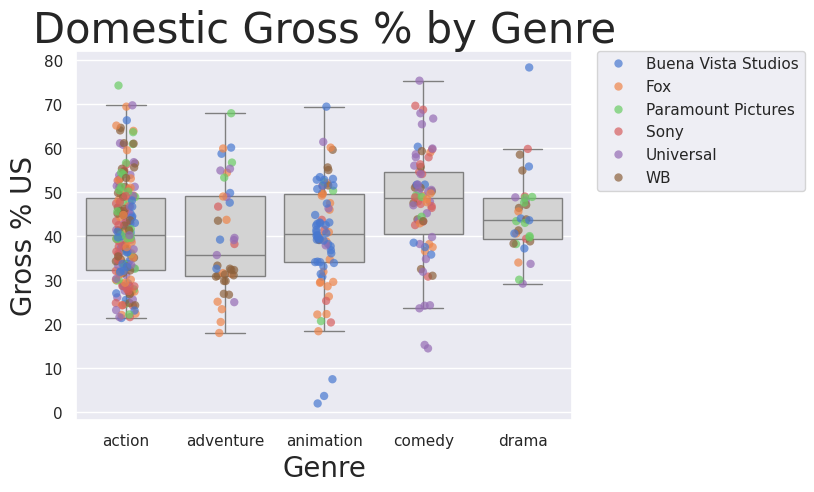

In [16]:
# Define the style
sns.set(style="darkgrid", palette="muted", color_codes=True)

# Plot the boxsplots
ax = sns.boxplot(data=moviesgs, x='Genre', y='Gross%US', orient='v', color='lightgray', showfliers=False)
plt.setp(ax.artists, alpha=0.5)

# Add in points to show each observation
sns.stripplot(x='Genre', y='Gross%US', data=moviesgs, jitter=True, size=6, linewidth=0, hue = 'Studio', alpha=0.7)

ax.axes.set_title('Domestic Gross % by Genre',fontsize=30)
ax.set_xlabel('Genre',fontsize=20)
ax.set_ylabel('Gross % US',fontsize=20)

# Define where to place the legend
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()